# Video infromation and Motion detection

In [1]:
import cv2
import numpy as np

# Load the video
video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration = frame_count / fps
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video Information:\nFrames: {frame_count}\nFPS: {fps}\nDuration: {duration} seconds\nResolution: {width}x{height}")

# Create a background subtractor for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2()

frame_number = 0

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame_number += 1
    
    # Apply background subtraction for motion detection
    fgmask = fgbg.apply(frame)
    
    # Display the frame and the foreground mask (motion detection)
    cv2.imshow('Frame', frame)
    cv2.imshow('Motion Detection', fgmask)
    
    # Exit on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


Video Information:
Frames: 402
FPS: 15.0
Duration: 26.8 seconds
Resolution: 320x240


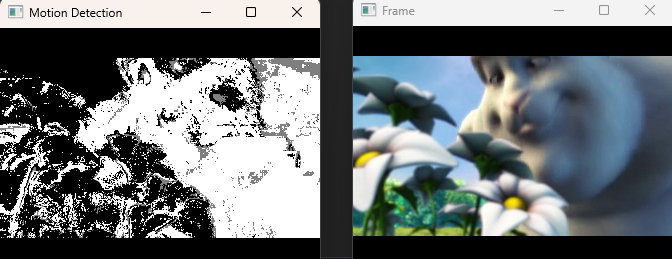

# Edge detection

In [3]:
import cv2

# Load the video
video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize the video writer for the edge-detected video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
edge_video_path = "edge_detection_video.avi"
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter(edge_video_path, fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

   
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    
    edges = cv2.Canny(gray_frame, 100, 200)

    
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    
    out.write(edges_colored)

    # Display the result
    cv2.imshow("Edge Detection", edges_colored)

    # Exit on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


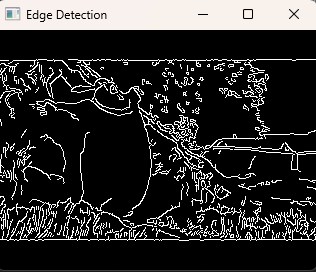

# Identifying  moving objects in the video and displays them with green rectangles on the original frames

In [6]:
import cv2

# Load the video
video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

# Print video properties
print(f"Total Frames: {frame_count}, FPS: {fps}, Duration: {duration:.2f} seconds")


# Motion detection using frame differencing
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)  # Difference between two consecutive frames
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    blur = cv2.GaussianBlur(gray, (5, 5), 0)  # Blur to reduce noise
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)  # Thresholding
    dilated = cv2.dilate(thresh, None, iterations=3)  # Dilate to fill in gaps
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Find contours

    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle around moving object

    # Display the result
    cv2.imshow("Frame", frame1)
    frame1 = frame2  # Update frame1 to be the current frame
    ret, frame2 = cap.read()  # Read the next frame

    if not ret:
        break

    # Press 'q' to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Total Frames: 402, FPS: 15.0, Duration: 26.80 seconds


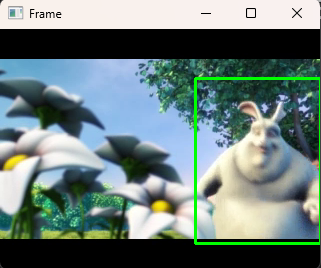

# Histogram for each frame

In [14]:
import cv2
import numpy as np

# Load the video
video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Parameters for histogram calculation
hist_size = [256]  
ranges = [0, 256]  

# Create an empty list to store histogram data
histograms = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale and compute the histogram
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_frame], [0], None, hist_size, ranges)
    histograms.append(hist)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Print histogram data for demonstration
print("Histogram Data:")
for i, hist in enumerate(histograms):
    print(f"Frame {i+1} Histogram:")
    print(hist.flatten())


Histogram Data:
Frame 1 Histogram:
[1.8404e+04 7.1500e+02 1.4300e+02 1.2600e+02 8.7000e+01 8.5000e+01
 3.0000e+01 6.9000e+01 1.5800e+02 1.7900e+02 3.3800e+02 2.5700e+02
 2.0500e+02 1.9000e+01 1.5700e+02 1.6000e+02 1.2600e+02 1.4500e+02
 8.8000e+01 9.4000e+01 2.4000e+01 8.1000e+01 1.1600e+02 1.0500e+02
 1.3400e+02 1.1500e+02 1.1200e+02 2.4000e+01 1.0200e+02 1.2100e+02
 1.1700e+02 1.5100e+02 1.7600e+02 2.2300e+02 4.3000e+01 2.0700e+02
 2.1100e+02 2.4200e+02 2.2500e+02 2.6100e+02 2.3900e+02 5.8000e+01
 2.3700e+02 3.0700e+02 2.9600e+02 2.5500e+02 2.9600e+02 2.9800e+02
 4.8000e+01 2.4800e+02 2.7800e+02 3.7000e+02 4.0300e+02 4.0200e+02
 3.5800e+02 6.7000e+01 2.9700e+02 3.9500e+02 4.1700e+02 4.3000e+02
 4.5200e+02 4.3400e+02 8.9000e+01 3.5800e+02 4.7600e+02 4.9100e+02
 4.5700e+02 4.2400e+02 4.7300e+02 1.0200e+02 3.5500e+02 4.8000e+02
 5.0100e+02 4.9600e+02 5.1100e+02 5.0100e+02 1.1800e+02 3.8300e+02
 4.2000e+02 4.8900e+02 4.7100e+02 4.4300e+02 4.3700e+02 1.0000e+02
 3.0600e+02 4.0900e+02 3.78

# creating a time-lapse video

In [7]:
import cv2

# Load the video
video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Parameters for time-lapse creation
frame_interval = 10 

# Initialize the video writer for the time-lapse
fourcc = cv2.VideoWriter_fourcc(*'XVID')
time_lapse_path = "time_lapse.avi"
fps = cap.get(cv2.CAP_PROP_FPS)
time_lapse_fps = 20  # FPS for the time-lapse video
out = cv2.VideoWriter(time_lapse_path, fourcc, time_lapse_fps, (int(cap.get(3)), int(cap.get(4))))

frame_index = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Time-lapse creation
    if frame_index % frame_interval == 0:
        out.write(frame)

    frame_index += 1

    # Display the frame
    cv2.imshow('Frame', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


# frame averaging

In [10]:
import cv2
import numpy as np

video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Parameters for frame averaging
frame_avg_count = 5  # Number of frames to average

# Initialize frame averaging variables
frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Collect frames for averaging
    frames.append(frame)
    if len(frames) > frame_avg_count:
        frames.pop(0)  

    # Frame Averaging
    if len(frames) == frame_avg_count:
        avg_frame = np.mean(np.array(frames), axis=0).astype(np.uint8)
        cv2.imshow('Frame Averaging', avg_frame)

    # Display the frame
    cv2.imshow('Original Frame', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# stabilizing video

In [14]:
import cv2
import numpy as np

video_path = "D:/College/sem 7/image and video analytics/da1/SampleVideo_360x240_2mb.mp4"
cap = cv2.VideoCapture(video_path)

# Parameters
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
stabilized_video_path = "stabilized_video.avi"
out = cv2.VideoWriter(stabilized_video_path, fourcc, fps, (int(cap.get(3)), int(cap.get(4))))

# Initialize variables
prev_frame = None
transforms = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if prev_frame is None:
        prev_frame = frame
        continue

    # Convert to grayscale
    gray_prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    gray_curr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect ORB keypoints and descriptors
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(gray_prev, None)
    kp2, des2 = orb.detectAndCompute(gray_curr, None)

    # Match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Find homography
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

    # Apply homography
    height, width, _ = frame.shape
    stabilized_frame = cv2.warpPerspective(frame, H, (width, height))

    # Write stabilized frame
    out.write(stabilized_frame)

    # Update previous frame
    prev_frame = frame

    # Display the result
    cv2.imshow("Stabilized Video", stabilized_frame)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
